In [19]:
# importing the required modules
import pandas as pd
import openpyxl as xl
import matplotlib.pyplot as plt
import numpy as np

In [20]:
path = r'https://github.com/Aussachaa/SFG/raw/main/DB_Performance_SFG.xlsx'
df = pd.read_excel(path, engine="openpyxl")

df = df.drop(columns=['GL', 'File_Name', 'Brand_Code'])
Acc_lst = ['TOTAL:SALES', 'DISCOUNT', 'NET SALES', 'COST OF GOODS SOLD',
           'GROSS PROFIT', 'TOTAL EXPENSE', 'NET PROFIT BEFORE TAX']
df = df[df['ACC Name'].isin(Acc_lst)]
df

,Brand,ACC Name,Period,Amount,ACT_FC
0,CL,TOTAL:SALES,JAN,16260.242500,Actual
1,CL,DISCOUNT,JAN,-5222.221770,Actual
2,CL,NET SALES,JAN,11038.020730,Actual
3,CL,COST OF GOODS SOLD,JAN,-4353.000290,Actual
4,CL,GROSS PROFIT,JAN,6685.020440,Actual
...,...,...,...,...,...
43669,CLEAR,NET SALES,M01-12,0.000000,Forecast
43670,CLEAR,COST OF GOODS SOLD,M01-12,0.000000,Forecast
43671,CLEAR,GROSS PROFIT,M01-12,0.000000,Forecast
43675,CLEAR,TOTAL EXPENSE,M01-12,-628.116104,Forecast


In [28]:
col_index = ['Brand', 'ACC Name', 'Period', 'ACT_FC']
rename_dict = {'COST OF GOODS SOLD': 'Cogs', 'DISCOUNT': 'Discount', 'GROSS PROFIT': 'Gross Profit', 'NET SALES': 'Net Sale', 'TOTAL EXPENSE': 'Expense', 'TOTAL:SALES': 'Sale', 'NET PROFIT BEFORE TAX': 'Net Profit'}
month_dict = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12}

df2 = df.groupby(col_index).sum()

df2.rename(index=rename_dict, level=1, inplace=True)

df2 = df2.unstack(level=3)

df2 = df2.droplevel([0], axis=1).reset_index()

df2 = df2.loc[(df2['ACC Name'].isin(['Net Sale', 'Gross Profit', 'Net Profit'])) & (df2['Period'].str.len() == 3)]

df2 = df2.sort_values('Period', key = lambda x : x.apply(lambda x : month_dict[x]))

df2

ACT_FC,Brand,ACC Name,Period,Actual,Forecast
4400,GR,Gross Profit,JAN,0.99330,0.000000
7340,OL,Gross Profit,JAN,0.00000,0.000000
872,CA,Gross Profit,JAN,0.00000,0.000000
10896,VO,Net Profit,JAN,-17.09882,-35.307917
8572,RN,Net Sale,JAN,0.00000,0.000000
...,...,...,...,...,...
9942,ST,Net Sale,DEC,0.00000,131.323107
1906,CO,Net Sale,DEC,0.00000,0.000000
5014,HD,Net Profit,DEC,0.00000,0.006379
7198,OD,Net Sale,DEC,0.00000,0.000000


In [29]:
df3 = df2.loc[df2['ACC Name'] == 'Net Sale']
df3

ACT_FC,Brand,ACC Name,Period,Actual,Forecast
8572,RN,Net Sale,JAN,0.00000,0.000000
3476,FF,Net Sale,JAN,26.17149,0.000000
4848,HC,Net Sale,JAN,4283.22986,5380.244905
7396,OL,Net Sale,JAN,0.00000,0.000000
928,CA,Net Sale,JAN,0.00000,0.000000
...,...,...,...,...,...
1710,CM,Net Sale,DEC,0.00000,0.000000
5042,HD,Net Sale,DEC,0.00000,0.000000
9942,ST,Net Sale,DEC,0.00000,131.323107
1906,CO,Net Sale,DEC,0.00000,0.000000


In [105]:
brand = 'HF'
df4 = df3.loc[df3['Brand'] == brand]
df4 = df4.drop(columns=['Brand', 'ACC Name'])
df4 = df4.assign(ACperFC = lambda x: (df4['Actual']/df4['Forecast']))
display(df4)

ACT_FC,Period,Actual,Forecast,ACperFC
5240,JAN,4572.78909,5149.060237,0.888082
5239,FEB,3740.09878,5553.229474,0.673500
5255,MAR,5954.59453,6845.229124,0.869890
5236,APR,4515.49896,6016.627195,0.750503
5256,MAY,5628.70492,6582.019215,0.855164
5242,JUN,5895.03194,7308.033016,0.806651
5241,JUL,4710.51996,7380.543909,0.638235
5237,AUG,0.00000,6455.066211,0.000000
5263,SEP,0.00000,6606.075916,0.000000
5258,OCT,0.00000,6449.086323,0.000000


C:\Users\aussa\AppData\Local\Temp\ipykernel_20600\1387059456.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


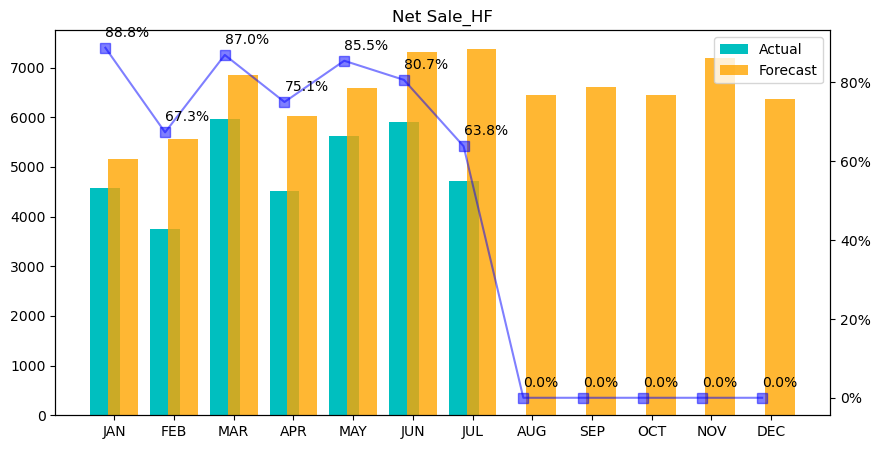

In [107]:
x_p = df4['Period']
y_ac = df4['Actual']
y_fc = df4['Forecast']
y_acperfc = df4['ACperFC']

#define subplots
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(x_p, y_ac, color='c', width=0.5, label='Actual')
pos = np.arange(len(x_p))
ax.bar([x + 0.3 for x in pos], y_fc, width=0.5, color='orange', alpha=0.8, label='Forecast')

ax2 = ax.twinx()
ax2.plot(x_p, y_acperfc, color='b', marker='s', markersize=7, alpha=0.5)

plt.xticks([r + 0.3/2 for r in range(len(x_p))], df4["Period"])
plt.title('Net Sale_' + brand)
ax.legend(loc='upper right')
for tx, ty in list(zip(x_p, y_acperfc)):
    ax2.annotate("{:,.1%}".format(ty), (tx, ty), textcoords='offset points', xytext=(0, 8), ha='left', fontsize=10)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.show()